In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# import the function to compute the class weights
from sklearn.utils import compute_class_weight

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [ ]:
#!pip install sklearn.utils

#pip install imblearn

In [ ]:
#  https://heartbeat.comet.ml/resampling-to-properly-handle-imbalanced-datasets-in-machine-learning-64d82c16ceaa

In [18]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


C:\Users\aalok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

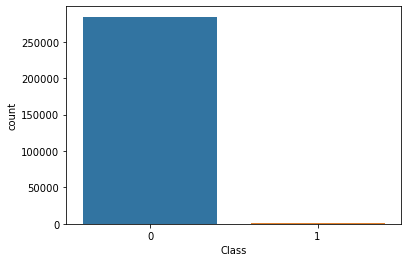

In [20]:
sns.countplot(data['Class'])

In [21]:

#calcuate the class weight by providing balanced parameter
weight = compute_class_weight(class_weight= "balanced", 
                              classes= np.unique(data.Class), 
                           y=data.Class)

print(weight)

[  0.50086524 289.43800813]


Resampling
There are multiple ways to handle the issue of imbalanced datasets. 
The techniques we’re going to use in this tutorials is called resampling.

Resampling is a widely-adopted technique for dealing with imbalanced datasets, and it is often very easy to implement,
fast to run, and an excellent starting point.
Resampling changes the dataset into a more balanced one by adding instances to the minority class or deleting ones from the majority class, that way we build better machine learning models.
The way to introduce these changes in a given dataset is achieved via two main methods: Oversampling and Undersampling.

Random undersampling randomly deletes records from the majority class. You should consider trying this technique when you have a lot of data.
A simple undersampling technique is to undersample the majority class randomly and uniformly. This can potentially lead to information loss, though. But if the examples of the majority class are near to others in terms of distance, this method might yield good results.

In [35]:
#   X = data.iloc[:,0:31]
#   y = data.iloc[:-1]

X = data.drop(['Class'], axis=1)
y= data['Class']

X.shape

(284807, 30)

In [24]:
#X_train, x_test, y_train, y_test = train_test_split(X,y, random_state=101, test_size=0.30)

In [33]:
under_sampler = RandomUnderSampler()

X_under, y_under = under_sampler.fit_resample(X, y)

In [34]:
print(X_under.shape)
print(y_under.shape)

(984, 30)
(984,)


sampling_strategy : This parameter can be used to tell the object how to perform undersampling on our dataset. 
It can be majority to resample only the majority class, not_minority to resample all classes but the minority class, 
and auto is the default one here, which stands for not_minority.
return_indices : Boolean on whether to return the indices of the removed instances or not.

## Over Sampling

In [36]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
X_over, y_over = over.fit_resample(X,y)

In [37]:
print(X_over.shape)
print(y_over.shape)

(568630, 30)
(568630,)


# SMOTE - Sythetically Minority Over sampling Technique

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
x_smote, y_Smote = smote.fit_resample(X,y)
print(x_smote.shape)
print(y_Smote.shape)

(568630, 30)
(568630,)


# NearMiss Undersampling

The basics of the NearMiss algorithms include the following:

The method starts by calculating the distances between all instances of the majority class and the instances of the minority class.
Then k instances of the majority class that have the smallest distances to those in the minority class are selected to be retained.
If there are n instances in the minority class, NearMiss will result in k × n instances of the majority class.

In [41]:
 #import the NearMiss object.
from imblearn.under_sampling import NearMiss

# create the object with auto
near = NearMiss(sampling_strategy="not minority")

# fit the object to the training data.
x_near, y_near = near.fit_resample(X, y)

# Undersampling with Tomek links

Tomek links are pairs of very close instances that belong to different classes. They’re samples near the borderline between classes. By removing the examples of the majority class of each pair, we increase the space between the two classes and move toward balancing the dataset by deleting those points.

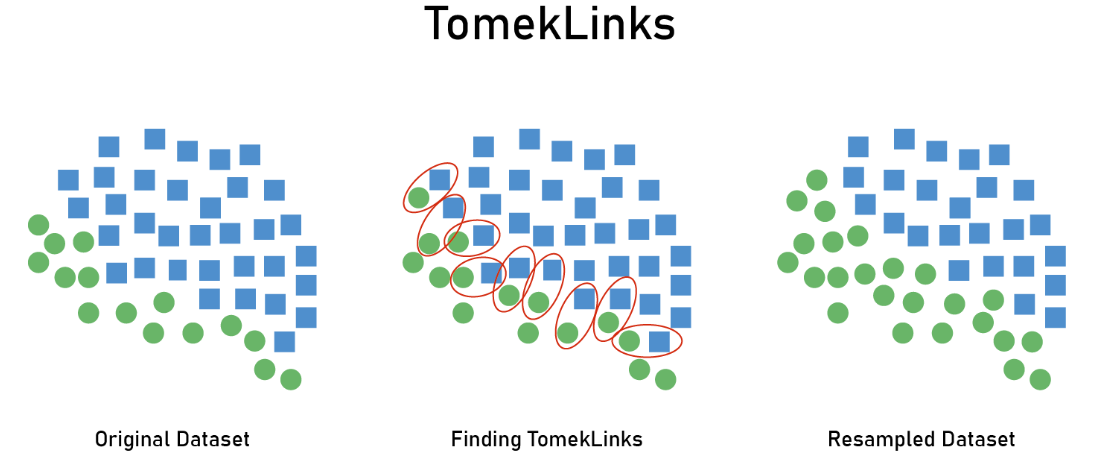

In [42]:
from IPython.display import Image
Image("Tomek Links.png")

In [44]:
# import the TomekLinks object.
from imblearn.under_sampling import TomekLinks

# instantiate the object with the right ratio strategy.
tomek_links = TomekLinks(sampling_strategy='majority')

# fit the object to the training data.
x_tl, y_tl = tomek_links.fit_resample(X, y)


# Undersampling with Cluster Centroids

The idea here is basically to remove the unimportant instance from the majority class. To decide whether an instance is important or not, we use the concept of clustering on the geometry of the feature space.

Clustering is an unsupervised learning approach, in which clusters are creating encircling data points belonging.

We will use it only to find cluster centroid that are obtained by averaging feature vector for all the features over the data points.

After finding the cluster centroid of the majority class, we decide the following:

The instance belonging to the cluster (majority class), which is farthest from the cluster centroid in the feature space, is considered to be the most unimportant instance.
The instance belonging to the majority class, which is nearest to the cluster centroid in the feature space, is considered to be the most important instance.

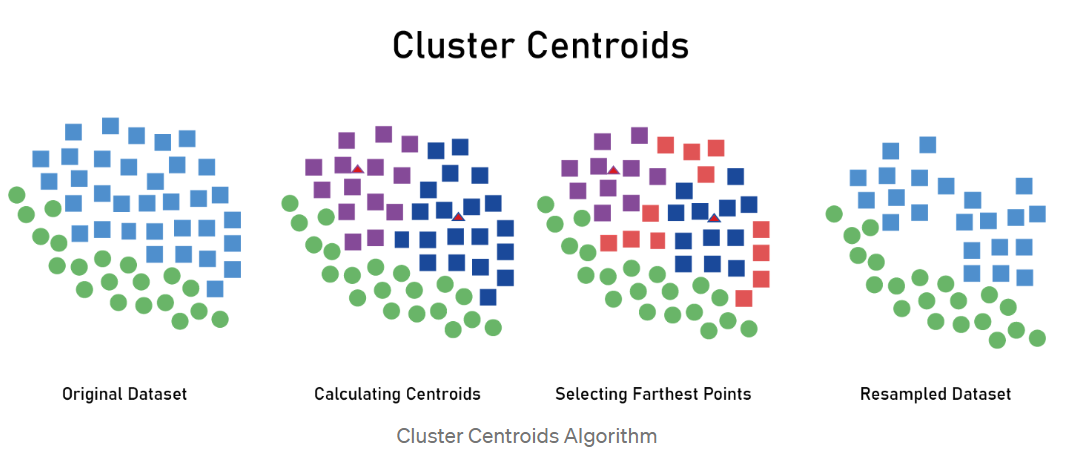

In [45]:
from IPython.display import Image
Image("ClusterCentroid.png")

In [49]:
from imblearn.under_sampling import ClusterCentroids

cluster = ClusterCentroids(sampling_strategy="auto", voting='soft')

X_cc, y_cc = cluster.fit_resample(X,y)